## 이미지 데이터 분류_딥러닝 기본 프레임 만들기

In [ ]:
딥러닝 모델 구현
(1) 모델 설정
(2) 모델 컴파일
(3) 모델 실행(학습)
(4) 모델 평가

Modelcheckpoint() : 모델 성과 저장 / 로드
EarlyStopping() : 모델 최적화 단계에서 학습 자동 중단 설정
모델 저장 / 로드

In [14]:
# 이미지 데이터 로드 및 전처리

# 이미지 데이터 셋 로드
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 차원 변환 및 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 원-핫 인코딩 (바이너리화)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [15]:
# 딥러닝 적용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# (1) 모델 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 활성화 함수
# 은닉층 : relu
# 출력층 : softmax

# relu 함수
# x가 0보다 작을 때는 모든 값을 0으로 처리하고
# 0보다 클 때는 x를 그대로 사용

# softmax 함수
# 3개 이상으로 분류하는 
# 다중 클래스 분류에서 사용하는 활성화 함수

In [16]:
# (2) 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 손실 함수(오차) : categorical_crossentropy
# 최적화 알고리즘 : adam
# Adam(Adaptive Moment Estimation)
# 각 파라미터마다 다른 크기의 업데이터 적용하는 방법

In [17]:
# 모델 성과 저장하도록 설정
# 모델의 최적화 단계에서 학습 자동 중단 : EarlyStopping
# 10회 이상 모델의 성과 향상이 없으면 자동으로 학습 중단하도록 설정

from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 모델 저장할 디렉터리 생상
# 현재 디렉터리에 model 디렉터리(폴더) 생성
# 존재하지 않으면 새로 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 저장할 파일명 설정 : epoch-val_loss.hdf5
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True)
    
#  EarlyStopping 설정
# 10회 이상 모델의 성과 향상이 없으면 자동으로 학습 중단 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
    
# 여기까지 실행하면 model 폴더만 생성되고
# 아직 파일 저장 안 됨

In [18]:
# (3) 모델 실행(학습)
# 새로 생성된 콜백 사용해서 모델 훈련
history = model.fit(X_train, Y_train,
                   validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

# 결과
# Epoch 00019에서 멈춤
# Epoch 00009 : 베스트 모델 (from 0.06334 to 0.06046)
# Epoch 00010부터 10회 이상 모델의 성과 향상 없어서 Epoch 00019에서 자동으로 학습을 중단

# model 폴더 확인 : 09-0.0605.hdf5 파일까지 저장 확인 (중복된 값은 저장 안 됨)


Epoch 00001: val_loss improved from inf to 0.15804, saving model to ./model/01-0.1580.hdf5

Epoch 00002: val_loss improved from 0.15804 to 0.11186, saving model to ./model/02-0.1119.hdf5

Epoch 00003: val_loss improved from 0.11186 to 0.08533, saving model to ./model/03-0.0853.hdf5

Epoch 00004: val_loss improved from 0.08533 to 0.08053, saving model to ./model/04-0.0805.hdf5

Epoch 00005: val_loss improved from 0.08053 to 0.06810, saving model to ./model/05-0.0681.hdf5

Epoch 00006: val_loss improved from 0.06810 to 0.06334, saving model to ./model/06-0.0633.hdf5

Epoch 00007: val_loss did not improve from 0.06334

Epoch 00008: val_loss did not improve from 0.06334

Epoch 00009: val_loss improved from 0.06334 to 0.06046, saving model to ./model/09-0.0605.hdf5

Epoch 00010: val_loss did not improve from 0.06046

Epoch 00011: val_loss did not improve from 0.06046

Epoch 00012: val_loss did not improve from 0.06046

Epoch 00013: val_loss did not improve from 0.06046

Epoch 00014: val_lo

In [19]:
# (4) 모델 평가
# 테스트 정확도 출력
print('\n 테스트 정확도 : %.4f' % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 4ms/step - loss: 0.0794 - accuracy: 0.9800

 테스트 정확도 : 0.9800


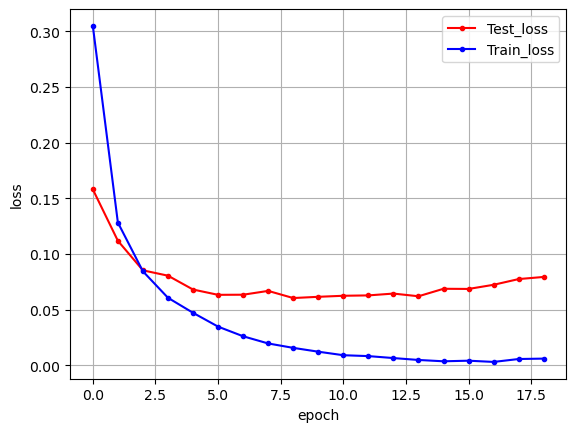

In [21]:
# val_loss와 loss 그래프로 표현

import matplotlib.pyplot as plt
import numpy

# 테스트 셋 val_loss(검증 손실 : 오차)
y_val_loss = history.history['val_loss']

# 학습 셋의 loss (오차)
y_loss = history.history['loss']

# 그래프 출력
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c='red', label='Test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Train_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
# 전체 과정을 하나로 합치기

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import tensorflow as tf

tf.random.set_seed(3)

# 이미지 데이터 셋 로드

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 차원 변환 및 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 원-핫 인코딩 (바이너리화)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# (1) 모델 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 활성화 함수
# 은닉층 : relu
# 출력층 : softmax

# relu 함수
# x가 0보다 작을 때는 모든 값을 0으로 처리하고
# 0보다 클 때는 x를 그대로 사용

# softmax 함수
# 3개 이상으로 분류하는 
# 다중 클래스 분류에서 사용하는 활성화 함수

# (2) 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 손실 함수(오차) : categorical_crossentropy
# 최적화 알고리즘 : adam
# Adam(Adaptive Moment Estimation)
# 각 파라미터마다 다른 크기의 업데이터 적용하는 방법

# 모델 성과 저장하도록 설정
# 모델의 최적화 단계에서 학습 자동 중단 : EarlyStopping
# 10회 이상 모델의 성과 향상이 없으면 자동으로 학습 중단하도록 설정

from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 모델 저장할 디렉터리 생상
# 현재 디렉터리에 model 디렉터리(폴더) 생성
# 존재하지 않으면 새로 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 저장할 파일명 설정 : epoch-val_loss.hdf5
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True)
    
#  EarlyStopping 설정
# 10회 이상 모델의 성과 향상이 없으면 자동으로 학습 중단 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
    
# 여기까지 실행하면 model 폴더만 생성되고
# 아직 파일 저장 안 됨


# (3) 모델 실행(학습)
# 새로 생성된 콜백 사용해서 모델 훈련
history = model.fit(X_train, Y_train,
                   validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

# 결과


# (4) 모델 평가
# 테스트 정확도 출력
print('\n 테스트 정확도 : %.4f' % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.14757, saving model to ./model/01-0.1476.hdf5

Epoch 00002: val_loss improved from 0.14757 to 0.10212, saving model to ./model/02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10212 to 0.08909, saving model to ./model/03-0.0891.hdf5

Epoch 00004: val_loss improved from 0.08909 to 0.07845, saving model to ./model/04-0.0784.hdf5

Epoch 00005: val_loss improved from 0.07845 to 0.07361, saving model to ./model/05-0.0736.hdf5

Epoch 00006: val_loss improved from 0.07361 to 0.06798, saving model to ./model/06-0.0680.hdf5

Epoch 00007: val_loss improved from 0.06798 to 0.06465, saving model to ./model/07-0.0646.hdf5

Epoch 00008: val_loss improved from 0.06465 to 0.06331, saving model to ./model/08-0.0633.hdf5

Epoch 00009: val_loss did not improve from 0.06331

Epoch 00010: val_loss improved from 0.06331 to 0.06291, saving model to ./model/10-0.0629.hdf5

Epoch 00011: val_loss did not improve from 0.06291

Epoch 00012: val_loss did not impro

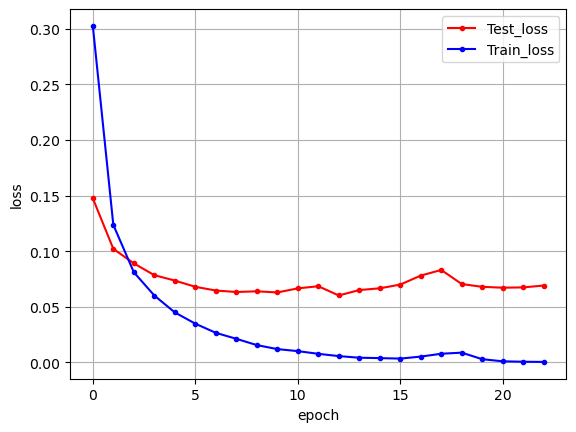

In [25]:
# val_loss와 loss 그래프로 표현

import matplotlib.pyplot as plt
import numpy

# 테스트 셋 val_loss(검증 손실 : 오차)
y_val_loss = history.history['val_loss']

# 학습 셋의 loss (오차)
y_loss = history.history['loss']

# 그래프 출력
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c='red', label='Test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Train_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()